<a href="https://colab.research.google.com/github/Faraz786313/Power-bi/blob/main/Faraz%20_Haque_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

## Import Libraries and connect to drive

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read data from google sheets into pandas data frame


In [ ]:

from io import BytesIO
import requests
r  = requests.get('https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/export?format=csv')
data = r.content
df = pd.read_csv(BytesIO(data),index_col=0,parse_dates=['Dt_Customer'])
pd.set_option('display.max_columns', None)
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Id,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
1386,1967,Graduation,Together,32474.0,1,1,########,0,10,0,1,0,0,0,1,1,0,2,7,0,0
5371,1989,Graduation,Single,21474.0,1,0,########,0,6,16,24,11,0,34,2,3,1,2,7,1,0


##Check for total rows and coloums with dataset info

In [ ]:
print("Total Number of rows:",df.shape[0])

print("Total Number of columns:",df.shape[1])


Total Number of rows: 2240
Total Number of columns: 21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 1826 to 4070
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

## Duplicated values

In [ ]:
len(df[df.duplicated()])

182

## Missing values

In [ ]:
obj = df.isnull().sum()
print(obj.to_string())

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0


In [ ]:
# finding avg income for each education level filling missing values with its corresponding educations avgerage
avg_income =  df.groupby(df['Education'])['Income'].transform('mean')
df.fillna({'Income':avg_income}, inplace=True)
print("Income",df['Income'].isnull().sum())

Income 0


## Convert Dt_Customer to date and time

In [ ]:

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format = '%m/%d/%Y',errors = 'coerce')
df['Dt_Customer'].head(5) # date time format


,Dt_Customer
Id,
1826,2014-06-16
1,2014-06-15
10476,2014-05-13
1386,NaT
5371,NaT


In [ ]:
obj = df['Dt_Customer'].isnull().sum()
print(obj)

916


In [ ]:
#Dt_customer coloumn has significant number of missing values thus would be dropped.
df.drop('Dt_Customer',axis = 1,inplace = True)

In [ ]:
# Reducing extra categories but better analysis
df.replace({'Marital_Status':{'YOLO':'Single','Absurd':'Single','Alone':'Single'}},inplace =True)

## Description of handeled missing values:
The data types of coulums Dt_customer were of type object which was converted into date type. the Dt_customer coloumn had no missing values but rather was filled with information not usefull to the datset thus those were converted to NAN accordingly using errors coerce.
Furthermore the income coloumn had 24 missing values which was filled using averages of income on basis of education level. The Marital Status has been simplified for better understanding like mering Absurd,YOLO and alone to one category as single.
The dataset had no further cleaning required.


##Visualization of key varibales to gain insights

## filtering age with threshold 100 as age beyond that are outliers and affect analysis

In [ ]:
# filtering age with threshold 100 as age beyond that are outliers and affect analysis
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Year_Birth']
threshold = 80
df = df[df['Age'] <= threshold]
df = df.reset_index(drop=True)

Text(0, 0.5, 'Frequency')

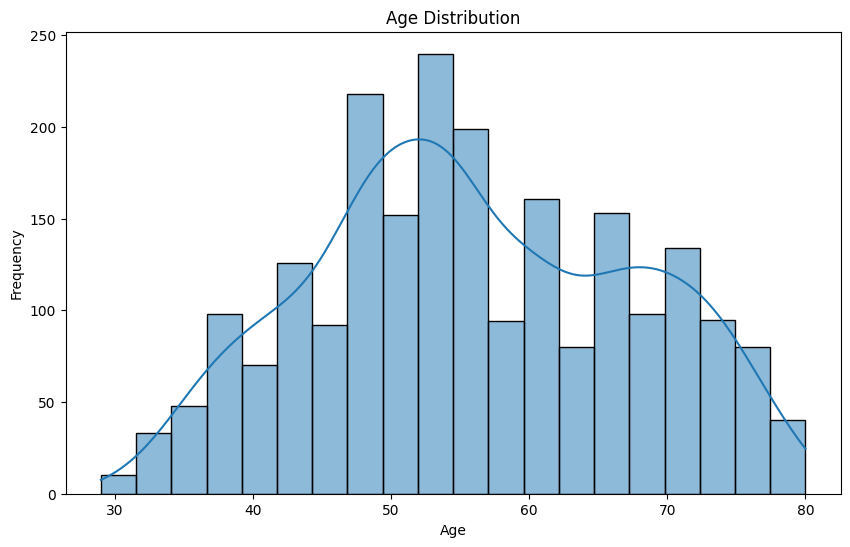

In [ ]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

## The Shape of the distribution is not perfectly symmetrical (not normally distributed). The presence of the two peaks suggests that the population might be composed of two distinct groups with different age profiles one with a mean age of 56 till which most of the population lies and at about 70 where we see another peak in our histogram. We see a steep increase from age 40 to 55 which is our main customer demographic further we see a decline in our customer base from the age 60 althought we see a peak at 70 which means after our main customer base we have another realtively distinct group from age 60 to 75.

In [ ]:
# sorting education column with respect to count for a uniform count plot
Education_sorted = df['Education'].value_counts().sort_values(ascending=False)

## `The Below image shows that the majority of the consumer demographics has a graduation level of education sitting at over 1000 people followed by a PhD at 450 and masters at 390. People with 2n Cycle(highschool) or Basic education is the least thus this could help us in creating startegies for our product targeting these groups.

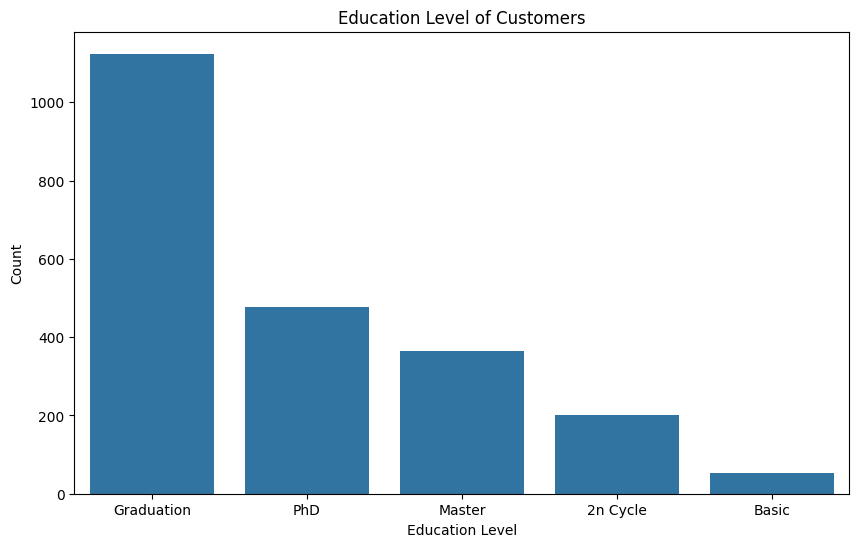

In [ ]:
# Education Level Distribution

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', order = Education_sorted.index)
plt.title('Education Level of Customers')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [ ]:
# sorting Marital Status column with respect to count for a uniform count plot
Marital_Status_sorted = df['Marital_Status'].value_counts().sort_values(ascending=False)

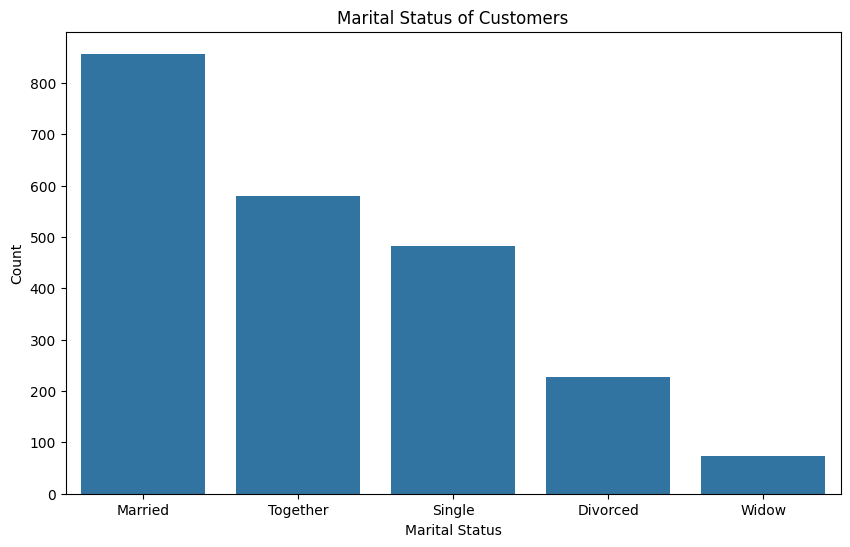

In [ ]:
# Marital Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status',order = Marital_Status_sorted.index)
plt.title('Marital Status of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# According to the count plot above we can say that most of the demographic is married,in a realtionship(together) or single. Followed by divorced and widowed this shows that majority of our demographics is either married, together or single.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Checking for Outliers

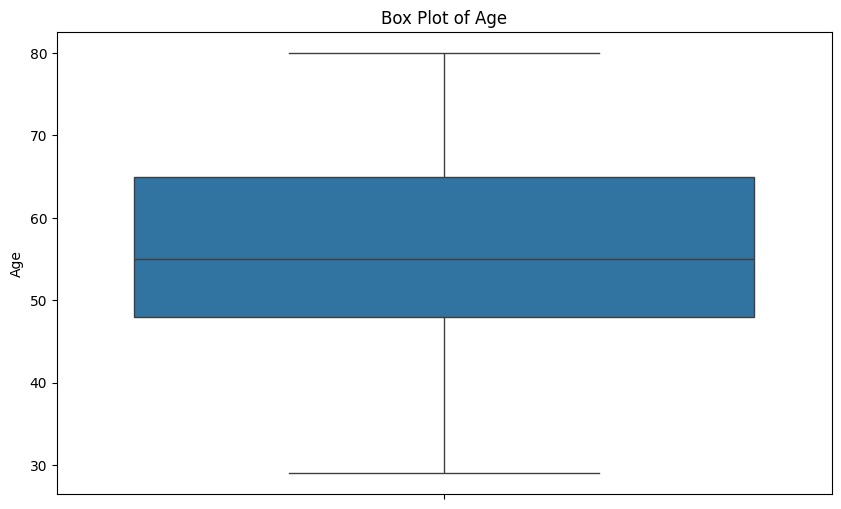

In [ ]:
# Age box plot for checking outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

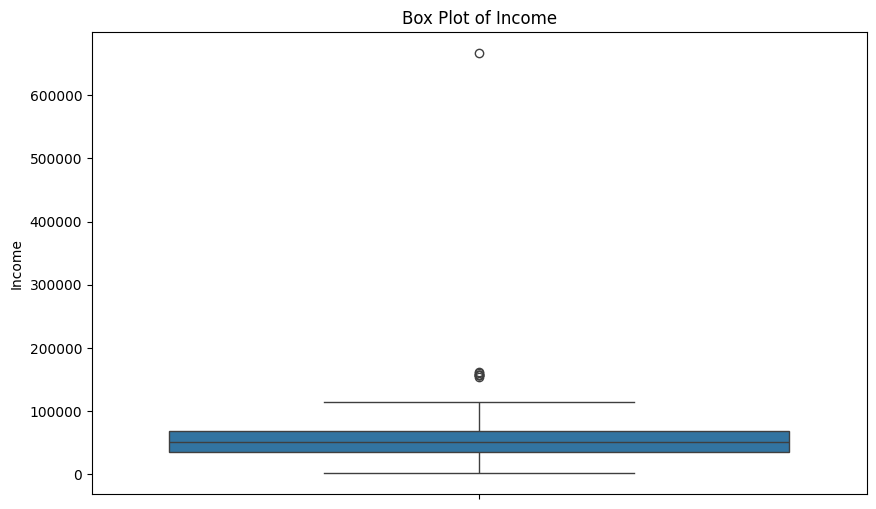

In [ ]:
#income box plot for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Income'])
plt.title('Box Plot of Income')
plt.ylabel('Income')
plt.show()

As we can see there are a significant number of outliers which could affect the analysis thus we will filter data +3 and -3 standard deviation from mean, this would take care of our outliers.

In [ ]:

# Calculate the standard deviation and mean of the 'Income' column
std_dev = df['Income'].std()
mean = df['Income'].mean()
# Filter the DataFrame to keep only the rows where 'Income' is within 3 standard deviations of the mean
df= df[ (df['Income'] >= mean - 3 * std_dev) & (df['Income'] <= mean + 3 * std_dev)]

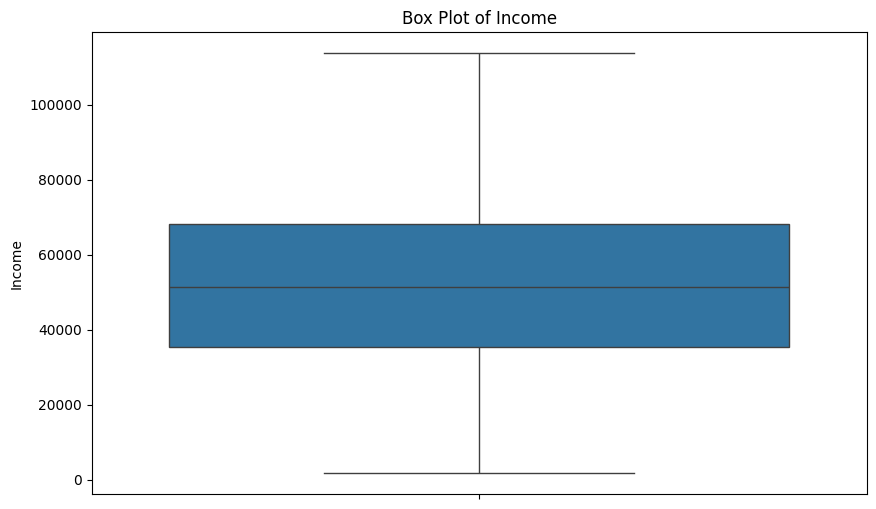

In [ ]:
#income box plot after handeling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Income'])
plt.title('Box Plot of Income')
plt.ylabel('Income')
plt.show()

In [ ]:
# Frequency counts for Education Level
education_counts = df['Education'].value_counts().sort_values(ascending=False)
print("Summary of Education Levels:")
print(education_counts)

Summary of Education Levels:
Education
Graduation    1121
PhD            473
Master         364
2n Cycle       201
Basic           54
Name: count, dtype: int64


In [ ]:
# Frequency counts for Maritial status
Marital_Status_counts = df['Marital_Status'].value_counts().sort_values(ascending=False)
print("Summary of Marital_Status:")
print(Marital_Status_counts)

Summary of Marital_Status:
Marital_Status
Married     854
Together    575
Single      483
Divorced    227
Widow        74
Name: count, dtype: int64


In [ ]:
#Frequency of Response counts
Response_counts = df['Response'].value_counts().sort_values(ascending=False)
print("Summary of Response:")
print(Response_counts )


Summary of Response:
Response
0    1883
1     330
Name: count, dtype: int64


In [ ]:
# Frequency of Complain
Complain_counts = df['Complain'].value_counts().sort_values(ascending=False)
print("Summary of Complain:")
print(Complain_counts)

Summary of Complain:
Complain
0    2194
1      19
Name: count, dtype: int64


In [ ]:
# Summary of Basic numerical Statistics
numerical_vars = ['Age', 'Income','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'NumWebVisitsMonth']
stats = df[numerical_vars].describe().transpose()
stats['variance'] = df[numerical_vars].var()
print("\nSummary of Basic Statistics:\n")
print(stats[['mean', '50%', 'variance', 'std','min','max']].rename(columns={'50%': 'median', 'std': 'std_dev'}))


Summary of Basic Statistics:

                             mean   median      variance       std_dev  \
Age                     55.924989     55.0  1.332105e+02     11.541684   
Income               51540.210749  51390.0  4.247947e+08  20610.549021   
Kidhome                  0.447808      0.0  2.907875e-01      0.539247   
Teenhome                 0.511071      0.0  2.970067e-01      0.544983   
Recency                 49.071848     49.0  8.380378e+02     28.948882   
MntWines               302.751469    173.0  1.128129e+05    335.876303   
MntFruits               26.205151      8.0  1.572772e+03     39.658185   
MntMeatProducts        164.318572     66.0  4.798679e+04    219.058870   
MntFishProducts         37.285585     12.0  2.960342e+03     54.409021   
MntSweetProducts        27.105287      8.0  1.706756e+03     41.312905   
MntGoldProds            44.222775     24.0  2.725797e+03     52.209167   
NumDealsPurchases        2.328061      2.0  3.606613e+00      1.899108   
NumWebP

### Detailed Report on Handling Missing Values, data inconsistency and outliers

#### 1. **Counting and Analyzing Null/missing Values**
First I can summed all the columns for missing values and after peforming these calculation, the income coloumn had 24 missing values which was filled using averages of income on basis of education level.

#### 2. **Counting, Analyzing and imputing duplicated Values**
The data types of coulums Dt_customer were of type object which was converted into date type. the Dt_customer coloumn had significant number of duplicated values of special character '######' thus those were converted to NAN accordingly using errors coerce but as the missing values were very large they could no longer provide useful information for analysis so the Dt_customer coloumn was dropped

#### 3. **Outliers**
The Age column had very high ages which was a result of dataset not being updated thus a threshold value of 80 was put to handle any age beyond that
Further the Income coloumn had also inconsistency in its column so to handel outliers income values +/- 3 std devitaion from the mean was removed.


#### 4. **Data inconsistancy**
The Marital Status has been simplified for better understanding like mering Absurd,YOLO and alone to one category as single. All other variables had appropritate data types and coloumns like Dt_customer of type object were initally converted to date type but due to huge amount of duplicated missing values the columns was dropped.

    Finally, the data has been checked for outliers, missing, duplicated values and has been cleaning accordingly

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [ ]:
import scipy.stats as stats

Probability of Success: 0.149118843199277
Expected Value: 0.149118843199277


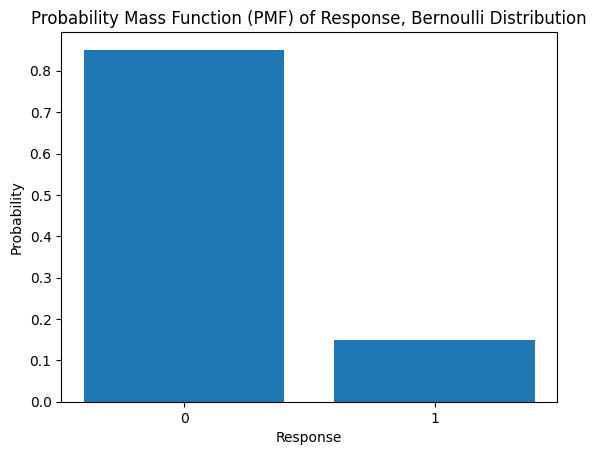

In [ ]:

# Response variable consists of 2 outcomes 0,1 bernoulli trails
mean_response = df['Response'].mean()
prob_success = stats.bernoulli.pmf(1,mean_response)
print("Probability of Success:", prob_success)
exp_mean = stats.bernoulli.mean(mean_response)
print("Expected Value:", exp_mean)

x = [0,1]
pmf_val = stats.bernoulli.pmf(x,mean_response)
plt.bar(x,pmf_val)
plt.xticks(x)
plt.title('Probability Mass Function (PMF) of Response, Bernoulli Distribution')
plt.xlabel('Response')
plt.ylabel('Probability')
plt.show()

Probability of Success: 0.00858563036601898
Expected Value: 0.00858563036601898


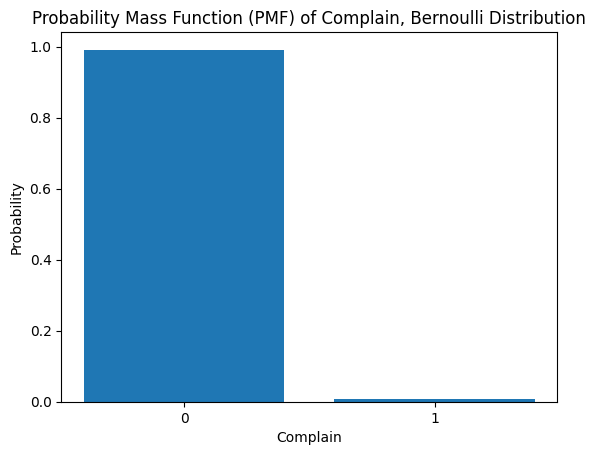

In [ ]:
# complain variable consists of 2 outcomes 0,1 bernoulli trails
mean_complain = df['Complain'].mean()
prob_success = stats.bernoulli.pmf(1,mean_complain)
print("Probability of Success:", prob_success)
exp_mean = stats.bernoulli.mean(mean_complain)
print("Expected Value:", exp_mean)

x = [0,1]
pmf_val = stats.bernoulli.pmf(x,mean_complain)
plt.bar(x,pmf_val)
plt.xticks(x)
plt.title('Probability Mass Function (PMF) of Complain, Bernoulli Distribution')
plt.xlabel('Complain')
plt.ylabel('Probability')
plt.show()

In [ ]:
# coloumns which we will fit to normal distribution
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for i in cols:
  mu,sigma = stats.norm.fit(df[i])

  prob_10 = stats.norm.cdf(10, mu, sigma)  # Probability of value <= 10
  expected_value = mu  # Expected value (mean) is the same as the estimated mean (mu)

  # Display results for each column
  print(f"Variable: {i}")
  print(f"Estimated Mean (mu): {mu:.2f}")
  print(f"Estimated Standard Deviation (sigma): {sigma:.2f}")
  print(f"Probability of value <= 10: {prob_10:.4f}")
  print(f"Expected Value (mean): {expected_value:.2f}\n")

Variable: MntWines
Estimated Mean (mu): 302.75
Estimated Standard Deviation (sigma): 335.80
Probability of value <= 10: 0.1917
Expected Value (mean): 302.75

Variable: MntFruits
Estimated Mean (mu): 26.21
Estimated Standard Deviation (sigma): 39.65
Probability of value <= 10: 0.3414
Expected Value (mean): 26.21

Variable: MntMeatProducts
Estimated Mean (mu): 164.32
Estimated Standard Deviation (sigma): 219.01
Probability of value <= 10: 0.2405
Expected Value (mean): 164.32

Variable: MntFishProducts
Estimated Mean (mu): 37.29
Estimated Standard Deviation (sigma): 54.40
Probability of value <= 10: 0.3080
Expected Value (mean): 37.29

Variable: MntSweetProducts
Estimated Mean (mu): 27.11
Estimated Standard Deviation (sigma): 41.30
Probability of value <= 10: 0.3394
Expected Value (mean): 27.11

Variable: MntGoldProds
Estimated Mean (mu): 44.22
Estimated Standard Deviation (sigma): 52.20
Probability of value <= 10: 0.2560
Expected Value (mean): 44.22



In [ ]:
# calulated possion distribution for count/frequency coloumns

freq_col = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']
for i in freq_col:
  mean = df[i].mean()
  possion_dist = stats.poisson(mean)
  pmf_val = possion_dist.pmf(5)
  cdf_val = possion_dist.cdf(5)
  expected_value = mean

  print(f"Variable: {i}")
  print(f"Estimated Mean (mu): {mean:.2f}")
  print(f"Expected Value (mean): {expected_value:.2f}")
  print(f"Probability of value <=5 : {cdf_val:.4f}")
  print(f"Probability of value extactly 5: {pmf_val:.4f}\n")

Variable: NumWebPurchases
Estimated Mean (mu): 4.09
Expected Value (mean): 4.09
Probability of value <=5 : 0.7713
Probability of value extactly 5: 0.1596

Variable: NumCatalogPurchases
Estimated Mean (mu): 2.62
Expected Value (mean): 2.62
Probability of value <=5 : 0.9496
Probability of value extactly 5: 0.0747

Variable: NumStorePurchases
Estimated Mean (mu): 5.80
Expected Value (mean): 5.80
Probability of value <=5 : 0.4789
Probability of value extactly 5: 0.1657

Variable: NumWebVisitsMonth
Estimated Mean (mu): 5.35
Expected Value (mean): 5.35
Probability of value <=5 : 0.5551
Probability of value extactly 5: 0.1734

Variable: NumDealsPurchases
Estimated Mean (mu): 2.33
Expected Value (mean): 2.33
Probability of value <=5 : 0.9685
Probability of value extactly 5: 0.0556



## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

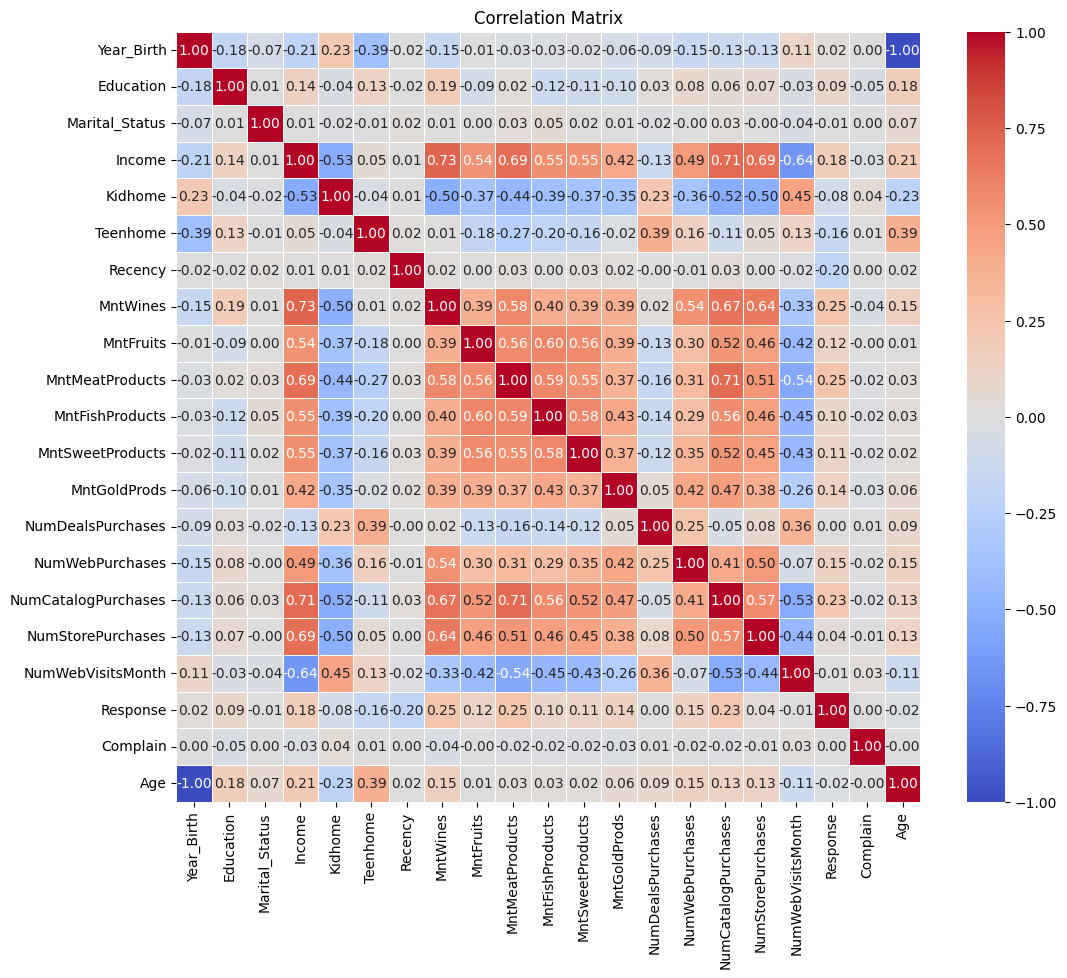

In [ ]:
# create a co-relation matrix of the dataset
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy()
for col in df_copy.select_dtypes(include=['object']).columns:
  df_copy[col] = LabelEncoder().fit_transform(df_copy[col])

corr_matrix = df_copy.corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**1.Income and spending:** Corelation between income and NumWebVisitsMonth,NumStorePurchases,NumCatalogPurcharses,MntSweetProducts,MntFishproducts,MntMeatproducts,MntFruits and MntWines is moderate to strongly positive corelated with their corelation ranging from 0.55 to 0.73.Which shows people tend to spend more on these products with higher income. Other variable are also positively corelation with moderatly positive association with NumWebPurchases ,MntGoldProds with corelation of 0.49 and 0.42 respectively. showing people with high income tend to spend more on wines,fruits and meats. .

**2.Kidhome with LowIncome:** KidHome has weak to a moderate association in the order of NumDealsPurcheses,NumWebPurchases,MntGoldProds,MntSweetProducts,MntFruits,MntFishProducts,MntMeatProducts,NumWebVisitsMonth,NumStorePurchases,MntWines,NumCatalogPurchases. All having a corelation of 0.23,0.36,0.35,0.37,0.37,0.39,0.44,0.45,0.5,0.5 and 0.52 repectively. This shows that our customer who has kids at home prefer purchasing instore with wines and catalogs being among their most buyed products followed by meats,fruits,fish etc.
The correation matrix also shows a moderatly strong negative assoication with kidhome meaning people with lower income tend to have kids

**3. Purchase Channels:**  NumWebPurchases, NumCatalogPurchases, and NumStorePurchases are positively correlated. This suggests that customers who use web purchases to buy their products also do come in store while, people who purchase online tend to not buy as much catalog as in-store buyers.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

Marketing Champaigns

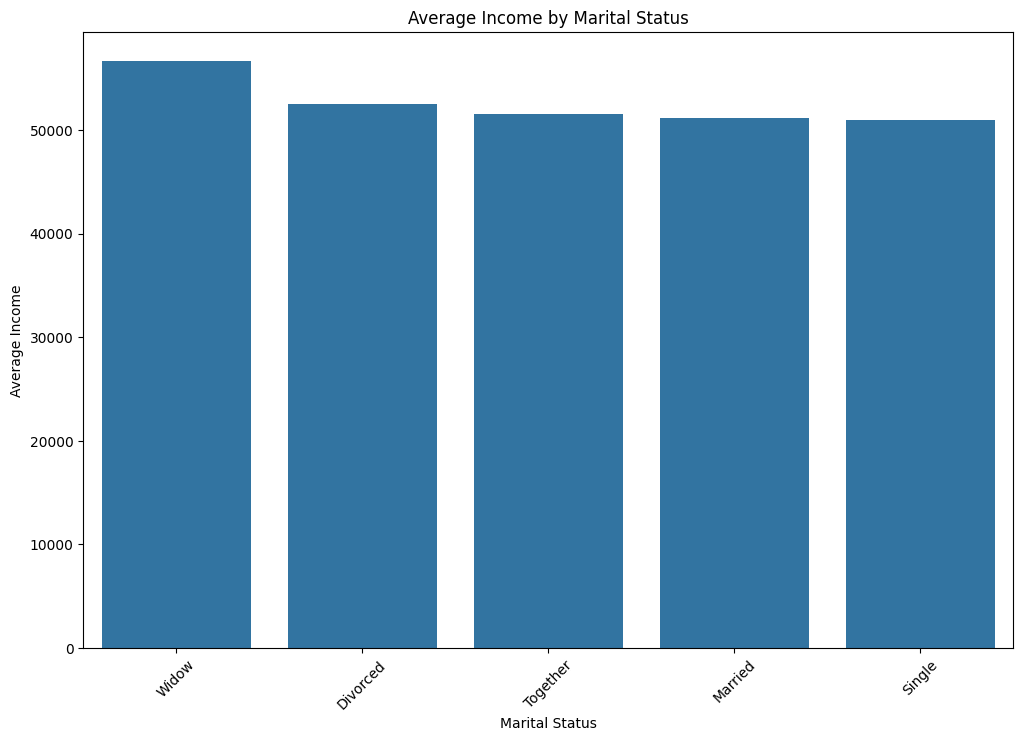

In [ ]:
#Average income per Marital status
avg_income_marital = df.groupby('Marital_Status')['Income'].mean().reset_index().sort_values(by ='Income',ascending = False)

plt.figure(figsize=(12,8))
sns.barplot(x='Marital_Status', y = 'Income', data=avg_income_marital)
plt.title('Average Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()

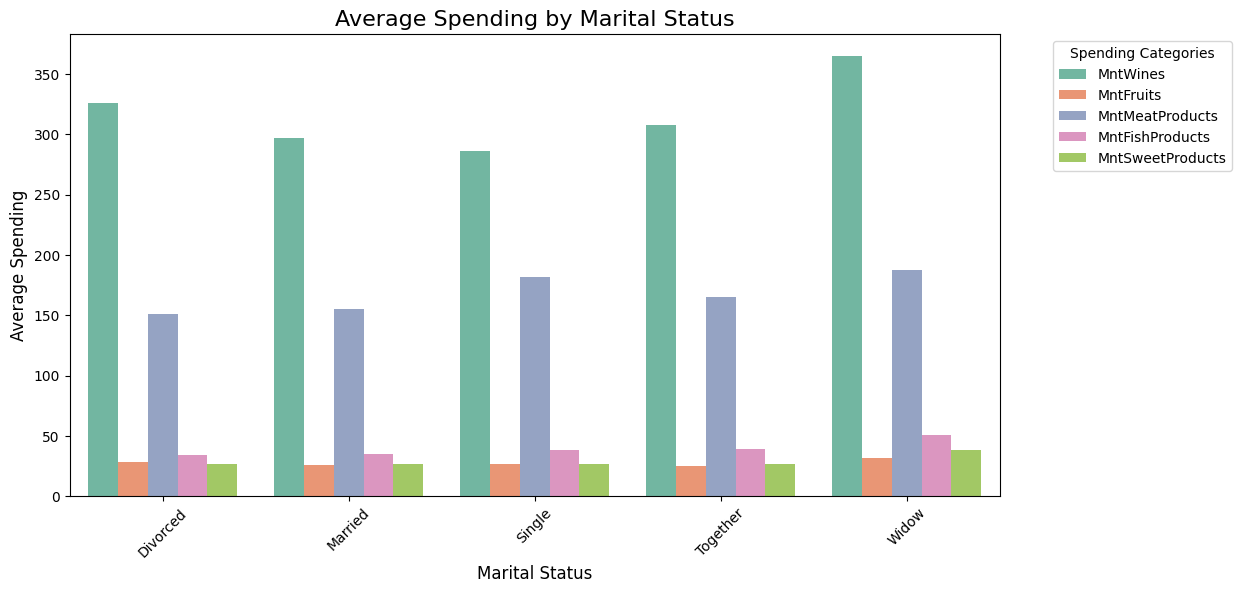

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame loaded from the data source

Mnt_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

avg_income_marital = df.groupby(['Marital_Status'])[Mnt_columns + ['Income']].mean().reset_index() # Include all Mnt_columns and Income

avg_spending_melted = avg_income_marital.melt(id_vars='Marital_Status',
                                             value_vars=Mnt_columns,
                                             var_name='Spending_Category',
                                             value_name='Average_Spending')

colors = sns.color_palette('Set2', n_colors=len(Mnt_columns))

plt.figure(figsize=(12, 6))
sns.barplot(x='Marital_Status', y='Average_Spending', hue='Spending_Category', data=avg_spending_melted, palette=colors)
plt.title('Average Spending by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Spending', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Spending Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## **Overall Observations:**

**Significant Variation in Wine Spending:**

The most notable variation across marital statuses is in the "MntWines" category. It's consistently the highest spending category for all marital statuses and shows the most significant fluctuations.

**Consistent Ranking of Product Categories: **

The general ranking of product category spending remains relatively consistent across different marital statuses. Wine is the highest, followed by meat, then fish/fruits, and finally sweets.

**"Widow" and "Together" Stand Out: **

The "Widow" and "Together" categories tend to have higher overall spending, particularly in the "MntWines" and "MntMeatProducts" categories.
Detailed Analysis by Marital Status:

**Divorced:**

High spending on wine, but relatively lower spending on other categories.
This group seems to prioritize wine purchases.

**Married:**

Shows a more balanced spending pattern across categories, although wine is still the highest.
Spending on meat is also relatively high compared to other categories.

**Single:**

Similar to divorced, wine is the highest, but the overall spending is lower.
Lower spending on meat compared to married or together groups.

**Together:**

High spending across all categories, especially wine and meat.
This group appears to have a higher overall budget for these products.

**Widow:**

Highest spending on wine and meat among all groups.
Suggests a possible preference or lifestyle difference within this group.

**Suggestions**
These insights provide how different lifestyle and maritial status is affecting different group's spending thus the Company can focus on to tailor Chamgains  based on these insights, like focusing on wine promotions for the "Widow" and "Together" groups , offering bundled deals for married couples or giving promotional discounts to singles during holidays.

<ipython-input-179-f169931e02fc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumDealsPurchases', y='Income', data=mean_income, palette='viridis')


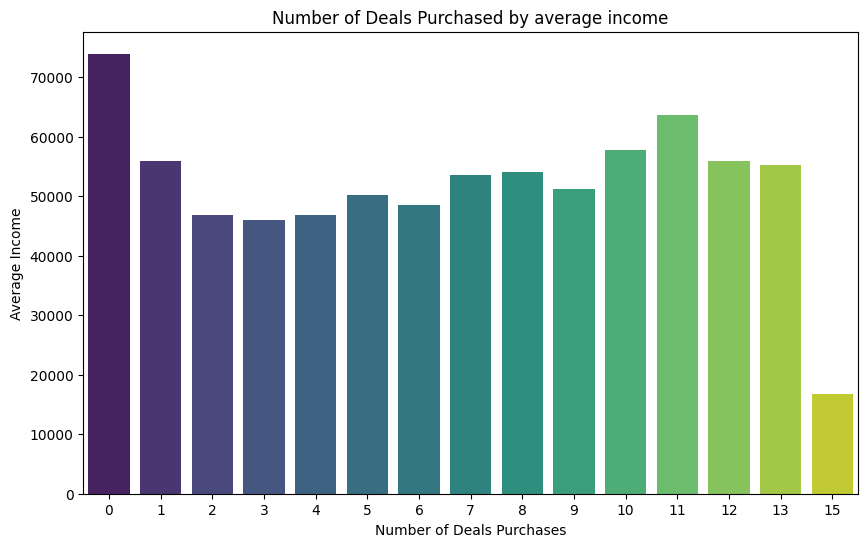

In [ ]:

df_selected = df[['Income', 'NumDealsPurchases']]

mean_income = df_selected.groupby('NumDealsPurchases').mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='NumDealsPurchases', y='Income', data=mean_income, palette='viridis')
plt.title('Number of Deals Purchased by average income')
plt.xlabel('Number of Deals Purchases')
plt.ylabel('Average Income')
plt.show()

**High Income for Zero Deals:**

The highest average income is observed for customers who purchased zero deals. This suggests that higher-income individuals may not be as price-sensitive or may not find the available deals appealing.

**Initial Drop in Income:**

There's a significant drop in average income for customers who purchased 1 deal compared to those who purchased none. This indicates that customers engaging with even a single deal tend to have lower incomes.

**Fluctuating Income for 1-10 Deals:**
The average income fluctuates for customers who purchased 1 to 10 deals, but there's a general trend of lower incomes in this range compared to those who purchased zero deals.

**Gradual Income Increase for 10+ Deals:**
There's a noticeable increase in average income for customers who purchased 10 or more deals, with the highest income observed for those who purchased 11 deals, followed by a slight decline.

**Income Decrease at 15 Deals:**
The average income drops significantly for customers who purchased 15 deals, suggesting a potential outlier or a specific segment that heavily engages with deals despite lower incomes.

## Strategic Recommendations:

**Target High-Income, Non-Deal Customers:**
Develop a premium customer program or exclusive offers that cater to high-income individuals who don't typically engage with deals. Focus on value, quality, and personalized experiences rather than discounts.

**1 deal problem:**
investigate why there's a significant drop in income for customers purchasing just one deal. Conduct surveys or analyze purchase patterns to understand their motivations and preferences and see why people purchase only one deal.

**Segment customers based on the number of deals purchased** tailor deals offerings and marketing messages to each segment.Customers purchasing 1-10 deals may be more price-sensitive and responsive to smaller discounts, while those purchasing 10+ deals may be seeking bulk discounts.

**Investigate the 15+ deals being utilized by the low income segment.** They might be purchasing essential items or heavily discounted products. Consider offering loyalty programs.This segment may represent a vulnerable population that relies on deals for affordability.



Text(0, 0.5, 'Count')

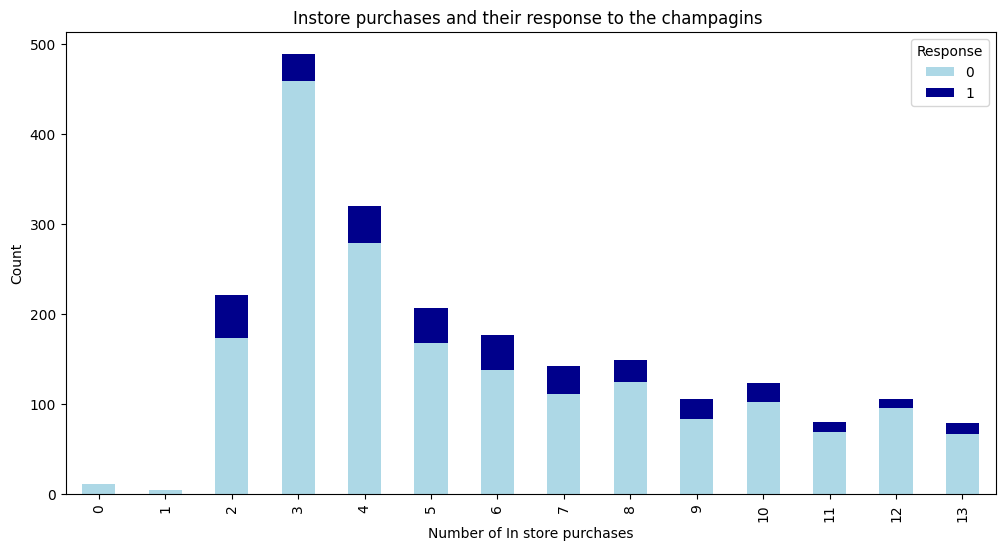

In [ ]:
#checking people who purchases instore and their response to the champagins
chamgaions_count = df.groupby('NumStorePurchases')['Response'].value_counts().unstack()
chamgaions_count.plot(kind='bar', stacked=True, color=['lightblue', 'darkblue'], figsize=(12, 6))
plt.title("Instore purchases and their response to the champagins ")
plt.xlabel('Number of In store purchases')
plt.ylabel('Count')

**Insights**

The largest number of customers have made 3 or 4 in-store purchases.
The count of customers decreases as the number of in-store purchases increases beyond 4.
The ratio of responders to non-responders fluctuates but generally shows a higher proportion of non-responders.

**Recommendation**

Focus on 3-4 Purchase Segment, develop targeted campaigns for customers who have made 3 or 4 in-store purchases. These customers are a significant segment and appear to have a higher response rate.

While the response rate is lower for high-purchase customers, they are still valuable. Explore why they are less responsive and consider alternative engagement strategies (e.g., loyalty programs).

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍